In [ ]:
  import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions

# Load pretrained MobileNetV2
model = MobileNetV2(weights='imagenet')

import cv2
import numpy as np

def extract_frames(video_path, max_frames=20):
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print("Error: Cannot open video")
        return np.array([])

    frames = []
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Handle videos where frame count is 0
    if total_frames > 0:
        step = max(1, total_frames // max_frames)
    else:
        step = 1

    count = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        if count % step == 0:
            frame = cv2.resize(frame, (224, 224))
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # 🔴 Important fix
            frames.append(frame)

        count += 1

        if len(frames) >= max_frames:
            break

    cap.release()
    print("Extracted frames:", len(frames))
    return np.array(frames)



def classify_video(video_path):
    frames = extract_frames(video_path)

    if len(frames) == 0:
        print("No frames extracted!")
        return


    frames = preprocess_input(frames)
    print("shape of frames" , np.array(frames).shape)
    print("first frame")
    print(np.array(frames[0]))
    predictions = model.predict(frames)
    print(predictions.shape)
    # Average predictions across frames
    avg_pred = np.mean(predictions, axis=0)
    print(avg_pred.shape)
    #top_pred = decode_predictions(np.expand_dims(avg_pred, axis=0), top=1)
    print("sum : " , np.sum(avg_pred))
    top_pred = decode_predictions(np.expand_dims(avg_pred, axis=0), top=5)

    for pred in top_pred[0]:
      print(pred[1], ":", round(pred[2]*100, 2), "%")


    print("Final Prediction:", top_pred[0][0][1])

# Replace with your video path
video_path = "real_world_demo_video.mp4"
classify_video(video_path)

Extracted frames: 20
shape of frames (20, 224, 224, 3)
first frame
[[[ 0.827451    0.6156863   0.04313731]
  [ 0.827451    0.6156863   0.04313731]
  [ 0.827451    0.6156863   0.04313731]
  ...
  [ 0.827451    0.6156863   0.04313731]
  [ 0.827451    0.6156863   0.04313731]
  [ 0.827451    0.6156863   0.04313731]]

 [[ 0.827451    0.6156863   0.04313731]
  [ 0.827451    0.6156863   0.04313731]
  [ 0.827451    0.6156863   0.04313731]
  ...
  [ 0.827451    0.6156863   0.04313731]
  [ 0.827451    0.6156863   0.04313731]
  [ 0.827451    0.6156863   0.04313731]]

 [[ 0.827451    0.6156863   0.04313731]
  [ 0.827451    0.6156863   0.04313731]
  [ 0.827451    0.6156863   0.04313731]
  ...
  [ 0.827451    0.6156863   0.04313731]
  [ 0.827451    0.6156863   0.04313731]
  [ 0.827451    0.6156863   0.04313731]]

 ...

 [[-0.6392157  -0.62352943 -0.64705884]
  [-0.6392157  -0.62352943 -0.64705884]
  [-0.6392157  -0.62352943 -0.64705884]
  ...
  [-0.6392157  -0.62352943 -0.64705884]
  [-0.6392157  -0

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
(20, 1000)
(1000,)
sum :  0.99999994
digital_clock : 63.84 %
traffic_light : 9.13 %
switch : 1.43 %
computer_keyboard : 1.32 %
matchstick : 0.85 %
Final Prediction: digital_clock


Extracted frames: 20


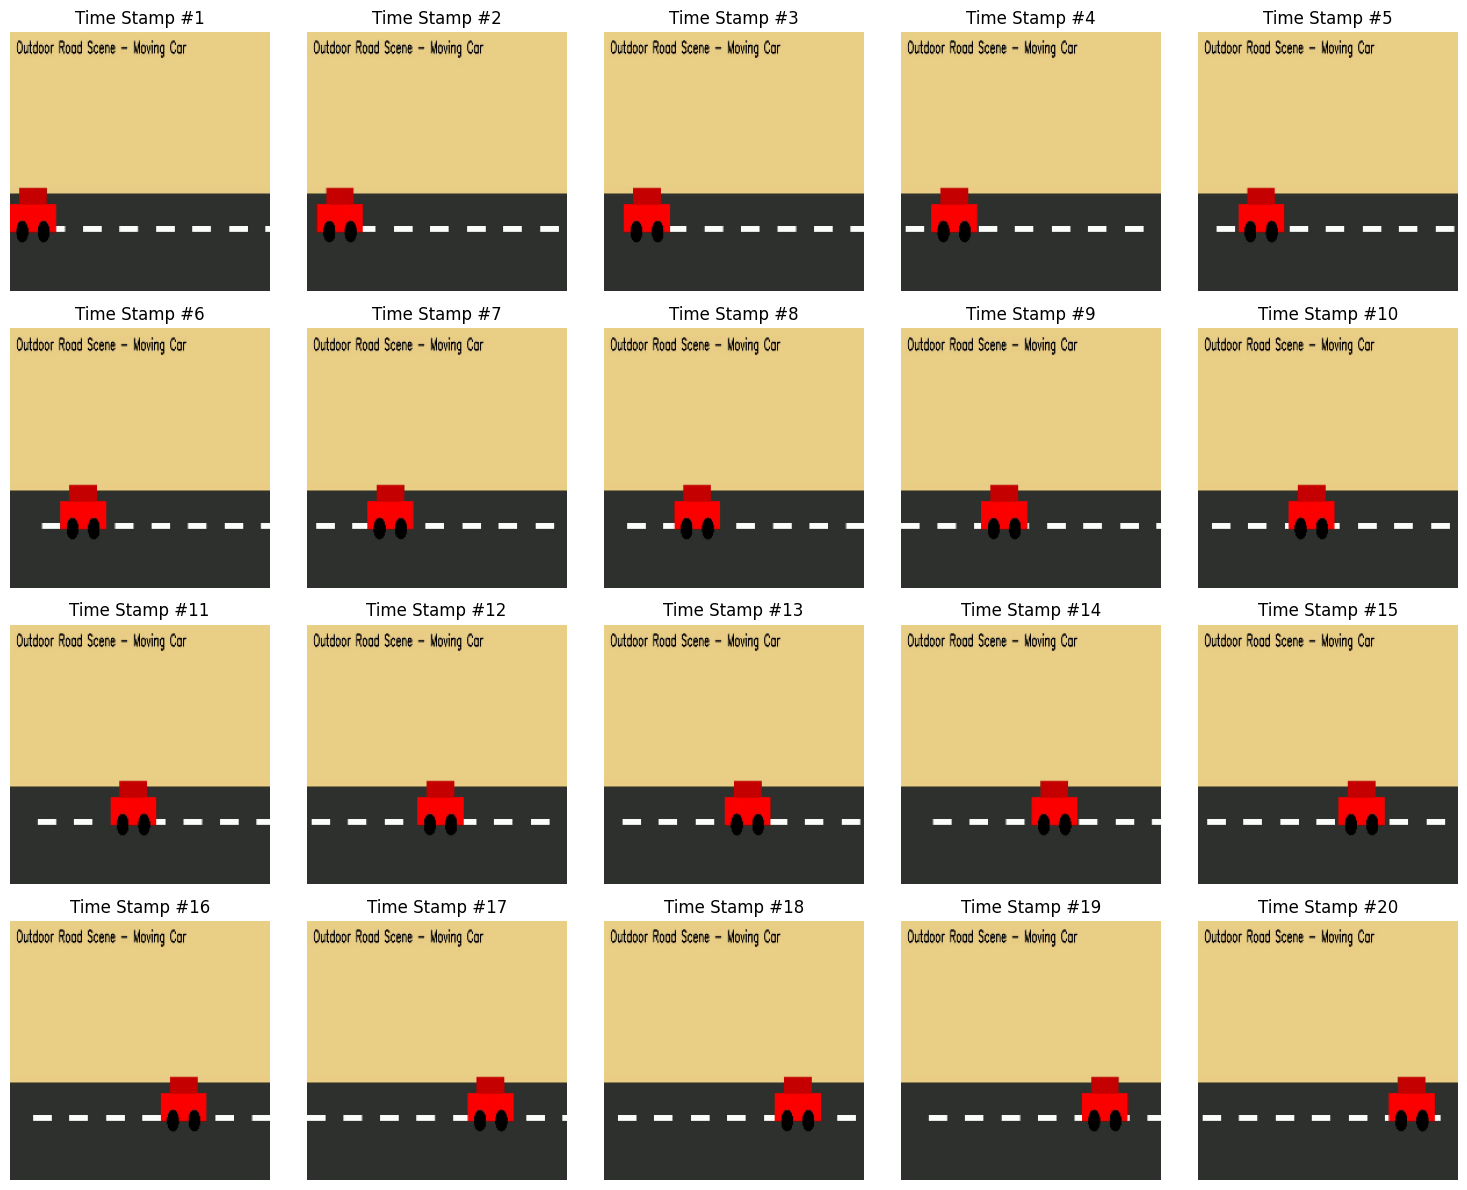

In [ ]:
import matplotlib.pyplot as plt

frames = extract_frames("/content/real_world_demo_video.mp4" , 20)

fig, axes = plt.subplots(4, 5, figsize=(15, 12)) # 4x5 grid for 20 images
for i, ax in enumerate(axes.flat):
    if i < len(frames):

        ax.imshow(frames[i])
        ax.axis('off') # Hide axes for a clean look
        ax.set_title(f"Time Stamp #{i+1}")
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

frames = extract_frames("/content/real_world_demo_video.mp4" , 20)

print("Pixel values of image at different Time Stamps : ")
for i in range(20):
  print(f"At time stamp {i+1}")
  print(frames[i])


Extracted frames: 20
Pixel values of image at different Time Stamps : 
At time stamp 1
[[[233 206 133]
  [233 206 133]
  [233 206 133]
  ...
  [233 206 133]
  [233 206 133]
  [233 206 133]]

 [[233 206 133]
  [233 206 133]
  [233 206 133]
  ...
  [233 206 133]
  [233 206 133]
  [233 206 133]]

 [[233 206 133]
  [233 206 133]
  [233 206 133]
  ...
  [233 206 133]
  [233 206 133]
  [233 206 133]]

 ...

 [[ 46  48  45]
  [ 46  48  45]
  [ 46  48  45]
  ...
  [ 46  48  45]
  [ 46  48  45]
  [ 46  48  45]]

 [[ 46  48  45]
  [ 46  48  45]
  [ 46  48  45]
  ...
  [ 46  48  45]
  [ 46  48  45]
  [ 46  48  45]]

 [[ 46  48  45]
  [ 46  48  45]
  [ 46  48  45]
  ...
  [ 46  48  45]
  [ 46  48  45]
  [ 46  48  45]]]
At time stamp 2
[[[233 206 133]
  [233 206 133]
  [233 206 133]
  ...
  [233 206 133]
  [233 206 133]
  [233 206 133]]

 [[233 206 133]
  [233 206 133]
  [233 206 133]
  ...
  [233 206 133]
  [233 206 133]
  [233 206 133]]

 [[233 206 133]
  [233 206 133]
  [233 206 133]
  ...
  [23